<a href="https://colab.research.google.com/github/SudhaSagasranaman/Cancer_prediction_Using-Logistics-Regression-model-program/blob/main/health_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/health_binary_classification.csv')
df.head()
print(df['Outcome'].value_counts())

Outcome
0    2993
1    2007
Name: count, dtype: int64


In [ ]:
#Divide the dataset into input and output variables
X = df.iloc[:,0:10]
print(X.head())
y = df.iloc[:,10]
print(y.head())

        Age       BMI  BloodPressure  Cholesterol  HeartRate   Glucose  \
0  1.513675 -2.815938      -6.550408     3.206314   0.553201 -0.879096   
1  1.719036 -4.853862      -4.828796     4.318680  -3.129748 -1.574312   
2  0.252386  0.252126      -0.815383    -0.851713  -2.072995 -3.723329   
3  0.062025  0.406379       2.021522     1.365662  -0.802058 -0.536730   
4  1.105373 -3.907145      -3.308508     1.493344  -0.363136  1.905277   

   FamilyHistory  PhysicalActivity   Smoking  AlcoholIntake  
0       3.421592         -0.231092  2.820313      -1.983360  
1       1.298912          4.367639  0.739433       0.508207  
2      -0.646902         -0.797961 -1.344175      -2.218642  
3       1.110541          1.132908 -1.947958      -1.328821  
4       1.176829         -0.636557 -0.973652      -0.989264  
0    0
1    1
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [ ]:
X.head()

,Age,BMI,BloodPressure,Cholesterol,HeartRate,Glucose,FamilyHistory,PhysicalActivity,Smoking,AlcoholIntake
0,1.513675,-2.815938,-6.550408,3.206314,0.553201,-0.879096,3.421592,-0.231092,2.820313,-1.983360
1,1.719036,-4.853862,-4.828796,4.318680,-3.129748,-1.574312,1.298912,4.367639,0.739433,0.508207
2,0.252386,0.252126,-0.815383,-0.851713,-2.072995,-3.723329,-0.646902,-0.797961,-1.344175,-2.218642
3,0.062025,0.406379,2.021522,1.365662,-0.802058,-0.536730,1.110541,1.132908,-1.947958,-1.328821
4,1.105373,-3.907145,-3.308508,1.493344,-0.363136,1.905277,1.176829,-0.636557,-0.973652,-0.989264


In [ ]:
3#Feature engineering
#geography = pd.get_dummies(X['Geography'],drop_first=True)
#gender = pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [ ]:
#X = X.drop(['Geography','Gender'],axis=1)

In [ ]:
#concating these encoded variables back to theoriginal data
#X = pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,Age,BMI,BloodPressure,Cholesterol,HeartRate,Glucose,FamilyHistory,PhysicalActivity,Smoking,AlcoholIntake
0,1.513675,-2.815938,-6.550408,3.206314,0.553201,-0.879096,3.421592,-0.231092,2.820313,-1.983360
1,1.719036,-4.853862,-4.828796,4.318680,-3.129748,-1.574312,1.298912,4.367639,0.739433,0.508207
2,0.252386,0.252126,-0.815383,-0.851713,-2.072995,-3.723329,-0.646902,-0.797961,-1.344175,-2.218642
3,0.062025,0.406379,2.021522,1.365662,-0.802058,-0.536730,1.110541,1.132908,-1.947958,-1.328821
4,1.105373,-3.907145,-3.308508,1.493344,-0.363136,1.905277,1.176829,-0.636557,-0.973652,-0.989264


In [ ]:
X.columns

Index(['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'HeartRate', 'Glucose',
       'FamilyHistory', 'PhysicalActivity', 'Smoking', 'AlcoholIntake'],
      dtype='object')

In [ ]:
#Splitting the dataset into training and test datas
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 1.49964668, -0.99896499, -0.15527312, ...,  0.51906379,
         0.76986096,  0.81505013],
       [ 0.2198103 , -0.37270606, -0.72788671, ...,  0.76679597,
         1.25444243, -0.38560965],
       [ 0.09934498, -0.51364   , -0.87997833, ...,  0.65874537,
        -0.33693189, -0.83477657],
       ...,
       [-1.03149966,  1.35575894,  0.32189645, ..., -1.22447974,
         0.18438919, -1.39547074],
       [ 0.83923695, -0.63091153,  0.21644568, ...,  0.41217561,
        -0.39240858,  1.14145467],
       [-0.61849388,  0.77564879,  1.44010531, ...,  0.9653763 ,
         0.67198656, -0.57164759]])

In [ ]:
#---- Basics what you already knew ----
#Create our ANN model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU

In [ ]:
#Initializing my ANN model
Classifier = Sequential()

In [ ]:
#Add my first layer/input layer
Classifier.add(Dense(units=10,activation='relu'))

In [ ]:
#Add first hidden layer
Classifier.add(Dense(units=7,activation='relu'))

In [ ]:
#Adding second hidden layer
Classifier.add(Dense(units=6,activation='relu'))

In [ ]:
#Creating output layer
Classifier.add(Dense(units = 1,activation = 'sigmoid'))

In [ ]:
#Training the neural network
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Enhancing the optimizer
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
Classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history = Classifier.fit(X_train,y_train, validation_split=0.33,batch_size = 10, epochs = 1000,callbacks=[early_stopping])

Epoch 1/1000
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7830 - loss: 0.4446 - val_accuracy: 0.9114 - val_loss: 0.2172
Epoch 2/1000
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9293 - loss: 0.1961 - val_accuracy: 0.9288 - val_loss: 0.1902
Epoch 3/1000
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9468 - loss: 0.1583 - val_accuracy: 0.9334 - val_loss: 0.1752
Epoch 4/1000
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9425 - loss: 0.1517 - val_accuracy: 0.9531 - val_loss: 0.1509
Epoch 5/1000
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9477 - loss: 0.1335 - val_accuracy: 0.9500 - val_loss: 0.1612
Epoch 6/1000
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9497 - loss: 0.1502 - val_accuracy: 0.9463 - val_loss: 0.1534
Epoch 7/1000
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9582 - loss: 0.1409 - val_accuracy: 0.9523 - val_loss: 0.1518
Epoch 8/1000
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9608 - loss: 0.1221 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

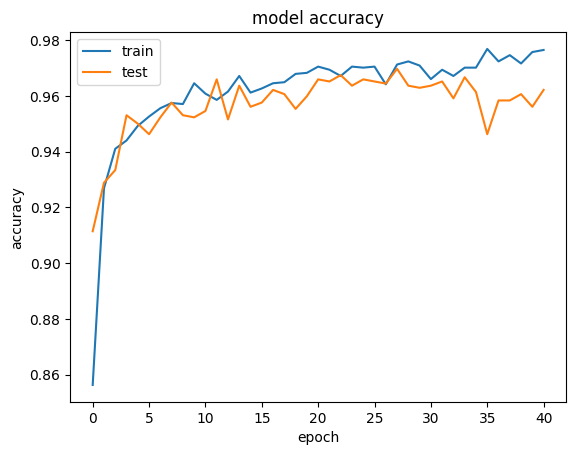

In [ ]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

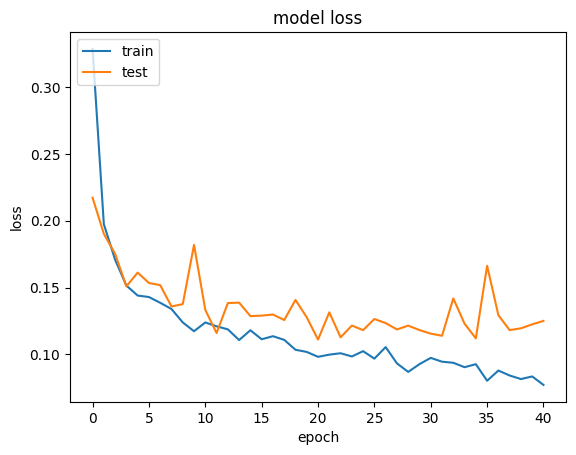

In [ ]:
#summarizing history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

In [ ]:
y_pred = Classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ Tru

# New Section

In [ ]:
#Make the confusion matrix as well
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
#Calculte the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.953